In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
import xarray as xr

from salishsea_tools import gsw_calls

%matplotlib inline

In [2]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')

In [3]:
tracers = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV17-02')
iY = 258; iX = 178; iZ = 28
depths = slice(0, iZ)
iY2 = 388; iX2 = 271

In [4]:
e3t = mesh.variables['e3t_0'][0, :iZ, iY, iX]

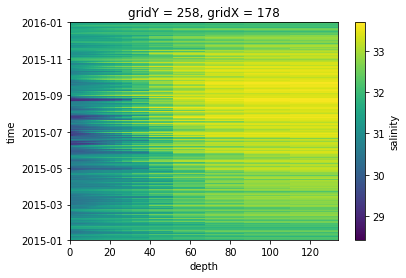

In [23]:
salinity2015 = tracers.salinity.sel(time ='2015', gridX=iX, 
                                    gridY=iY, method='nearest').isel(depth=depths)
salinity2015.plot()

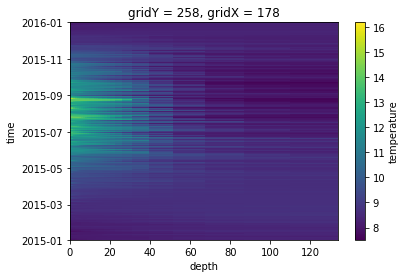

In [24]:
temperature2015 = tracers.temperature.sel(time ='2015', gridX=iX, 
                                    gridY=iY, method='nearest').isel(depth=depths)
temperature2015.plot()

In [25]:
sigma2015 = gsw_calls.generic_gsw_caller(
        'gsw_sigma0.m', [salinity2015.values, temperature2015.values])

In [26]:
tlen = sigma2015.shape[0]
south2015 = np.sum(sigma2015[0:tlen] * e3t, axis=1)

In [27]:
# now make pandas arrays of these so I can day bin them etc
den2015 = pd.DataFrame(data=south2015, index=salinity2015.time, columns=['sigma'])
#den2015_2 = pd.DataFrame(data=north2015, index=salinity2015.time, columns=['sigma'])

In [28]:
day_avg_south2015 = den2015.resample('1D').mean()
#day_avg_south2015_2 = den2015_2.resample('1D').mean()

In [29]:
day_avg_south2015.to_csv('day_avg_south2015.csv')
#day_avg_south2015_2.to_csv('day_avg_south2015.csv')

In [ ]:
salinity2016 = tracers.salinity.sel(time ='2016', gridX=iX, 
                                    gridY=iY, method='nearest').isel(depth=depths)
temperature2016 = tracers.temperature.sel(time ='2016', gridX=iX, 
                                    gridY=iY, method='nearest').isel(depth=depths)

In [ ]:
salinity2016.plot()

In [ ]:
temperature2016.plot()

In [ ]:
sigma2016 = gsw_calls.generic_gsw_caller(
        'gsw_sigma0.m', [salinity2016.values, temperature2016.values])

In [ ]:
tlen = sigma2016.shape[0]
south2016 = np.sum(sigma2016[0:tlen] * e3t, axis=1)

In [ ]:
den2016 = pd.DataFrame(data=south2016, index=salinity2016.time, columns=['sigma'])

In [ ]:
day_avg_south2016 = den2016.resample('1D').mean()

In [ ]:
day_avg_south2016.to_csv('day_avg_south2016.csv')

In [8]:
salinity2015_2 = tracers.salinity.sel(time ='2015', gridX=iX2, 
                                    gridY=iY2, method='nearest').isel(depth=depths)
temperature2015_2 = tracers.temperature.sel(time ='2015', gridX=iX2, 
                                    gridY=iY2, method='nearest').isel(depth=depths)

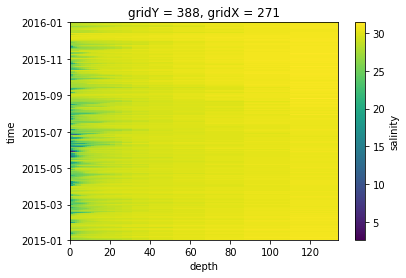

In [10]:
salinity2015_2.plot()

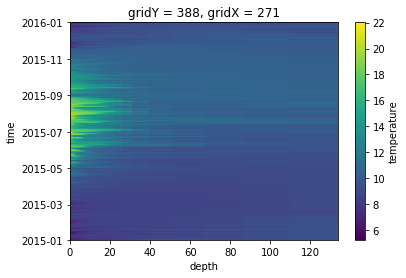

In [9]:
temperature2015_2.plot()

In [11]:
sigma2015_2 = gsw_calls.generic_gsw_caller(
        'gsw_sigma0.m', [salinity2015_2.values, temperature2015_2.values])

In [12]:
tlen = sigma2015_2.shape[0]
south2015_2 = np.sum(sigma2015_2[0:tlen] * e3t, axis=1)

In [13]:
# now make pandas arrays of these so I can day bin them etc
den2015_2 = pd.DataFrame(data=south2015_2, index=salinity2015_2.time, columns=['sigma'])

In [14]:
#day_avg_south2015 = den2015.resample('1D').mean()
day_avg_south2015_2 = den2015_2.resample('1D').mean()

In [15]:
#day_avg_south2015.to_csv('day_avg_south2015.csv')
day_avg_south2015_2.to_csv('day_avg_south2015.csv')

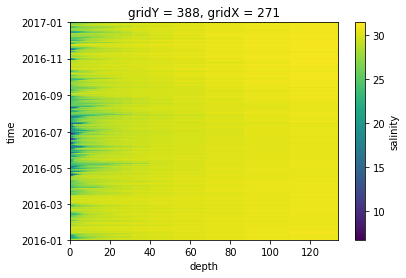

In [16]:
salinity2016_2 = tracers.salinity.sel(time ='2016', gridX=iX2, 
                                    gridY=iY2, method='nearest').isel(depth=depths)
salinity2016_2.plot()

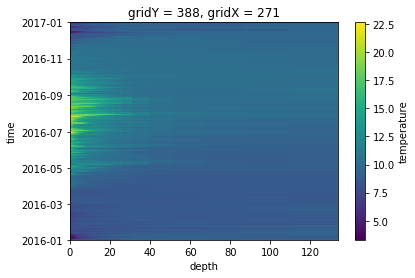

In [17]:
temperature2016_2 = tracers.temperature.sel(time ='2016', gridX=iX2, 
                                    gridY=iY2, method='nearest').isel(depth=depths)
temperature2016_2.plot()

In [18]:
sigma2016_2 = gsw_calls.generic_gsw_caller(
        'gsw_sigma0.m', [salinity2016_2.values, temperature2016_2.values])

In [19]:
tlen = sigma2016_2.shape[0]
south2016_2 = np.sum(sigma2016_2[0:tlen] * e3t, axis=1)

In [20]:
# now make pandas arrays of these so I can day bin them etc
den2016_2 = pd.DataFrame(data=south2016_2, index=salinity2016_2.time, columns=['sigma'])

In [21]:
#day_avg_south2015 = den2015.resample('1D').mean()
day_avg_south2016_2 = den2016_2.resample('1D').mean()

In [22]:
#day_avg_south2015.to_csv('day_avg_south2015.csv')
day_avg_south2016_2.to_csv('day_avg_north2016.csv')

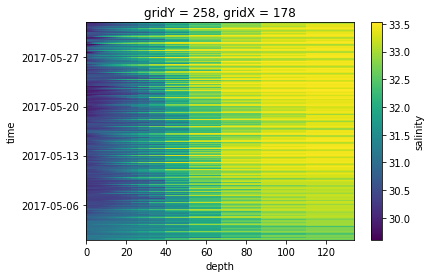

In [67]:
salinity2017n = tracers.salinity.sel(time ='2017-05', gridX=iX, 
                                    gridY=iY, method='nearest').isel(depth=depths)
salinity2017n.plot()

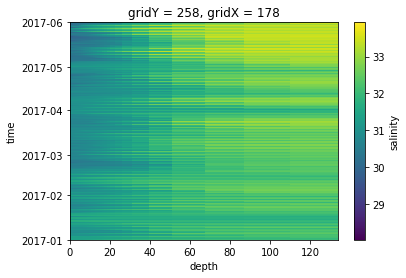

In [68]:
salinity2017 = xr.concat([salinity2017, salinity2017n], dim='time')
salinity2017.plot()

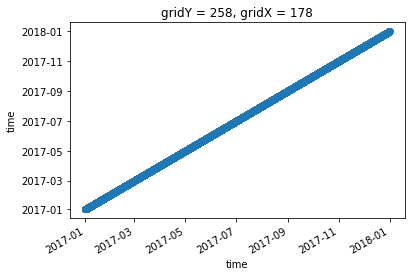

In [69]:
salinity2017.time.plot(marker='o')

In [70]:
salinity2017.to_netcdf('salinity2017_ss.nc')

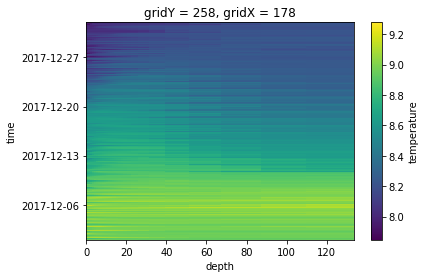

In [92]:
temperature2017n = tracers.temperature.sel(time ='2017-12', gridX=iX, 
                                    gridY=iY, method='nearest').isel(depth=depths)
temperature2017n.plot()

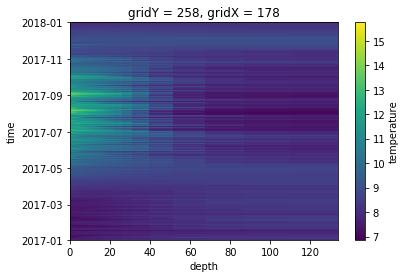

In [93]:
temperature2017 = xr.concat([temperature2017, temperature2017n], dim='time')
temperature2017.plot()

In [94]:
temperature2017.to_netcdf('temperature2017_ss.nc')

In [95]:
sigma2017 = gsw_calls.generic_gsw_caller(
        'gsw_sigma0.m', [salinity2017.values, temperature2017.values])

In [96]:
tlen = sigma2017.shape[0]
south2017 = np.sum(sigma2017[0:tlen] * e3t, axis=1)

In [97]:
den2017 = pd.DataFrame(data=south2017, index=salinity2017.time, columns=['sigma'])

In [98]:
day_avg_south2017 = den2017.resample('1D').mean()

In [99]:
day_avg_south2017.to_csv('day_avg_south2017.csv')

In [ ]:
sigma2016_2 = gsw_calls.generic_gsw_caller(
        'gsw_sigma0.m', [salinity2016_2.values, temperature2016_2.values])

In [ ]:
salinity2017_2 = tracers.salinity.sel(time ='2017', gridX=iX2, 
                                    gridY=iY2, method='nearest').isel(depth=depths)
temperature2017_2 = tracers.temperature.sel(time ='2017', gridX=iX2, 
                                    gridY=iY2, method='nearest').isel(depth=depths)

In [ ]:
sigma2017_2 = gsw_calls.generic_gsw_caller(
        'gsw_sigma0.m', [salinity2017_2.values, temperature2017_2.values])

In [ ]:
tlen = sigma2017.shape[0]
south2017 = np.sum(sigma2017[0:tlen] * e3t, axis=1)
north2017 = np.sum(sigma2017_2[0:tlen] * e3t, axis=1)

In [ ]:
den2016 = pd.DataFrame(data=south2016, index=salinity2016.time, columns=['sigma'])
den2016_2 = pd.DataFrame(data=north2016, index=salinity2016.time, columns=['sigma'])

In [ ]:
den2017 = pd.DataFrame(data=south2017, index=salinity2017.time, columns=['sigma'])
den2017_2 = pd.DataFrame(data=north2017, index=salinity2017.time, columns=['sigma'])

In [ ]:
catsouth = pd.concat([den2015, den2016, den2017])
catnorth = pd.concat([den2015_2, den2016_2, den2017_2])

In [ ]:
day_avg_south = catsouth.resample('1D').mean()
day_avg_north = catnorth.resample('1D').mean()

In [ ]:
msouth = day_avg_south.rolling(window=4, center=True).mean()
mnorth = day_avg_north.rolling(window=4, center=True).mean()

In [ ]:
fig, ax = plt.subplots(1, 1)
day_avg_south.plot(ax=ax)
day_avg_north.plot(ax=ax)
msouth.plot(ax=ax)
mnorth.plot(ax=ax)

In [ ]:
plt.plfig, ax = plt.subplots(1, 1)
(day_avg_south-day_avg_north).plot(ax=ax)
(msouth-mnorth).plot(ax=ax)

In [ ]:
msouth.to_csv('south_sigma_57.csv')
mnorth.to_csv('north_sigma_57.csv')